# Convexity of the objective function
In this notebook I qualitatively analyze the convexity of the objective function MSE and MEE

The regularization strenght is fixed to $\lambda = 0.01$.
For the sake of visualization, I will use only one parameter $w$ and a fixed bias $b=1$. The dataset is composed by one pattern $x=2$ with target $y=4$. Basically the neural network will be the function 

$$g(x;w) = f(w \cdot x + b)$$

where the activation function $f$ is one of "Linear", "ReLU", "Sigmoid" e "TanH" 

In [1]:
from neural_network import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# examples and labels
x = [[2]]
y = np.array([4])

# objective function
mse = SquaredError()
mee = EuclideanError()
# network architecture
architecture = [1, 1]
# domain of objective function [-5,5]
weights = np.linspace(-5, 5, 10000)
activations = [LinearNeuron, ReLuNeuron, SigmoidNeuron, TanHNeuron]

def compute_loss(network, weights, loss_object):
    loss_values = [] # list of losses
    for w in weights:
        current_w = [w, 1] # bias 1
        network.layers[1].neurons[0].weights = current_w # set neuron weights
        score = network.predict(x)
        loss, _ = loss_object.value(score, y, regularization=0.01, weights=current_w)
        loss_values.append(loss)
    return loss_values

def plot_loss_vs_weight(weights, loss_values):
    plt.figure()
    plt.plot(weights, loss_values, linewidth=2)
    plt.xlabel("w")
    plt.ylabel("E(w)")
    plt.show()

### MSE curves

LinearNeuron
(min value, iter): 0.03244450117579015 6496


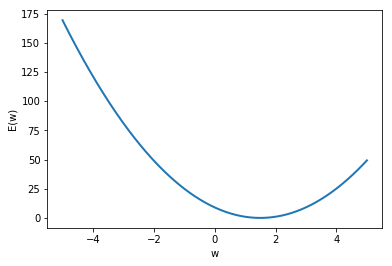

ReLuNeuron
(min value, iter): 0.03244450117579015 6496


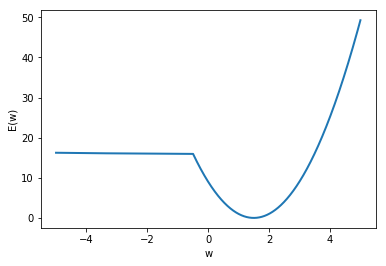

SigmoidNeuron
(min value, iter): 9.085002441264301 7282


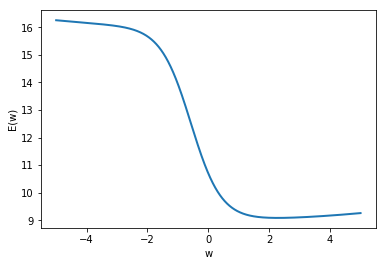

TanHNeuron
(min value, iter): 9.035537107410537 6367


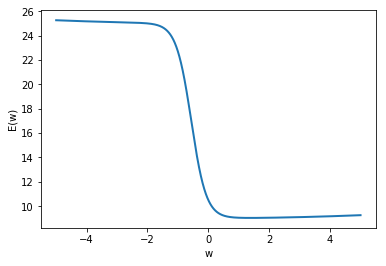

In [3]:
for activation in activations:
    print activation.__name__
    network = Network(architecture, [InputNeuron, activation])
    loss_values = compute_loss(network, weights, mse)
    print "(min value, iter):", min(loss_values), np.argmin(loss_values)
    plot_loss_vs_weight(weights, loss_values)

### MEE curves

LinearNeuron
(min value, iter): 0.03318957018214125 6499


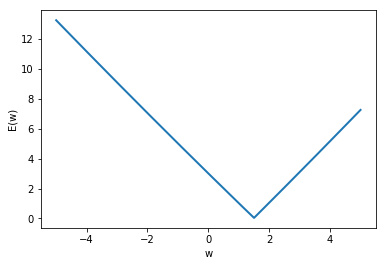

ReLuNeuron
(min value, iter): 0.03318957018214125 6499


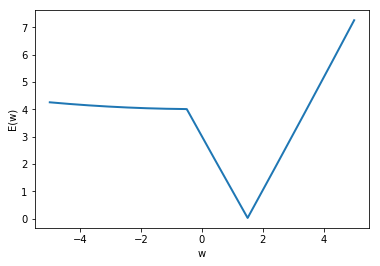

SigmoidNeuron
(min value, iter): 3.050320442453799 6563


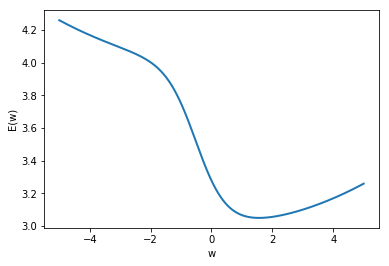

TanHNeuron
(min value, iter): 3.0249448877920395 5997


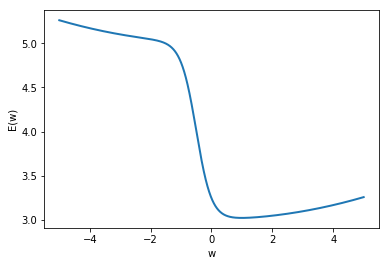

In [4]:
for activation in activations:
    print activation.__name__
    network = Network(architecture, [InputNeuron, activation])
    loss_values = compute_loss(network, weights, mee)
    print "(min value, iter):", min(loss_values), np.argmin(loss_values)
    plot_loss_vs_weight(weights, loss_values)

In [24]:
from neural_network import *
import numpy as np

# training set
x_train = np.array([ [x] for x in np.linspace(0, 2, 50)])
y_train = np.sin(x_train) + x_train**2 + 2

# define network architecture 
architecture = [1, 5, 1]
neurons = [InputNeuron, SigmoidNeuron, LinearNeuron]
net = Network(architecture, neurons)

# fitting
tr_loss, tr_error, _, _, _, gradient_norm = net.train_SGD(x_train, y_train, 
                                                             x_test=None, 
                                                             y_test=None, 
                                                             lossObject=SquaredError(), 
                                                             epochs=1000, 
                                                             learning_rate=0.01,
                                                             batch_size=16, 
                                                             momentum=0.9, 
                                                             regularization=0.001, 
                                                             epsilon=1e-2)

stop: norm gradient. Epoch 140
